## This notebook shows how to use Orchestrator APIs for user experiments

In [1]:
import os
from fabric_cm.credmgr.credmgr_proxy import CredmgrProxy
from fabric_cf.orchestrator.orchestrator_proxy import OrchestratorProxy
import json

In [2]:
credmgr_host = os.environ['FABRIC_CREDMGR_HOST']
credmgr_proxy = CredmgrProxy(credmgr_host=credmgr_host)
orchestrator_host = os.environ['FABRIC_ORCHESTRATOR_HOST']
orchestrator_proxy = OrchestratorProxy(orchestrator_host=orchestrator_host)

### Fabric Tokens
Fabric has 2 kinds of tokens:<br>
- Identity : required for Control/Measurement Framework APIs. Identity Token is valid upto an hour.
- Refresh : required to generate new Identity Tokens valid. Refresh Token is valid for 24 hours.

Fabric Identity token is required for Control/Measurement Framework APIs.<br>

When user logins to Jupyterhub after authenticating against CILogon, OIDC refresh token is derived. <br>
This token is available as the environment variable `CILOGON_REFRESH_TOKEN`.<br>

On the first login, we use `CILOGON_REFRESH_TOKEN` to generate new Fabric Identity Token and Fabric Refresh Token.<br>
For any subsequent use, we use Fabric Refresh Token. On every refresh, Fabric Refresh Token is changed and updated.<br>

NOTE: These steps are required for any experiments on Fabric Testbed.<br>

In [3]:
not_found=False
fabric_refresh_token=None
%store -r fabric_refresh_token

if fabric_refresh_token is None:
    fabric_refresh_token=os.environ['CILOGON_REFRESH_TOKEN']
    %store fabric_refresh_token
print("Fabric Refresh Token {}".format(fabric_refresh_token))
print("CILOGON_REFRESH_TOKEN environment variable: {}".format(os.environ['CILOGON_REFRESH_TOKEN']))

no stored variable or alias fabric_refresh_token
Stored 'fabric_refresh_token' (str)
Fabric Refresh Token NB2HI4DTHIXS6Y3JNRXWO33OFZXXEZZPN5QXK5DIGIXTEZBVGMZDQODCGBRTANDEGA3GIMLBMI4DEYTBMY3TKYTBGE4WMNJ7OR4XAZJ5OJSWM4TFONUFI33LMVXCM5DTHUYTMMJYGY3DEMJYGA3DCMBGOZSXE43JN5XD25RSFYYCM3DJMZSXI2LNMU6TQNRUGAYDAMBQ
CILOGON_REFRESH_TOKEN environment variable: NB2HI4DTHIXS6Y3JNRXWO33OFZXXEZZPN5QXK5DIGIXTEZBVGMZDQODCGBRTANDEGA3GIMLBMI4DEYTBMY3TKYTBGE4WMNJ7OR4XAZJ5OJSWM4TFONUFI33LMVXCM5DTHUYTMMJYGY3DEMJYGA3DCMBGOZSXE43JN5XD25RSFYYCM3DJMZSXI2LNMU6TQNRUGAYDAMBQ


### Get new Fabric Identity Token and update Fabric Refresh Token

Users can request tokens with different Project and Scopes by altering `project_name` and `scope` parameters in the refresh call below.

In [4]:
try:
    refresh_res = credmgr_proxy.refresh(project_name='all', scope='all', refresh_token=fabric_refresh_token)
    print("New Tokens received: {}".format(json.dumps(refresh_res)))
    fabric_id_token=refresh_res['id_token']
    fabric_refresh_token=refresh_res['refresh_token']
    print()
    print("New Refresh Token: {}".format(fabric_refresh_token))
    print()
    print("Stored new Refresh Token")
    %store fabric_refresh_token
except Exception as e:
    print("Exception occurred while getting tokens:{}".format(e))

New Tokens received: {"id_token": "eyJ0eXAiOiJKV1QiLCJhbGciOiJSUzI1NiIsImtpZCI6ImI0MTUxNjcyMTExOTFlMmUwNWIyMmI1NGIxZDNiNzY2N2U3NjRhNzQ3NzIyMTg1ZTcyMmU1MmUxNDZmZTQzYWEifQ.eyJlbWFpbCI6Im1pbmF3bUBidS5lZHUiLCJjZXJ0X3N1YmplY3RfZG4iOiIvREM9b3JnL0RDPWNpbG9nb24vQz1VUy9PPUJvc3RvbiBVbml2ZXJzaXR5L0NOPU1pbmEgV2lsbGlhbSBNb3Jjb3MgQjQxMzUwNzg3IiwiaWRwIjoiaHR0cHM6Ly9zaGliLmJ1LmVkdS9pZHAvc2hpYmJvbGV0aCIsImlkcF9uYW1lIjoiQm9zdG9uIFVuaXZlcnNpdHkiLCJlcHBuIjoibWluYXdtQGJ1LmVkdSIsImVwdGlkIjoiaHR0cHM6Ly9zaGliLmJ1LmVkdS9pZHAvc2hpYmJvbGV0aCFodHRwczovL2NpbG9nb24ub3JnL3NoaWJib2xldGghUmZSTTBqUWdkYWJHbWFNZmRkRUVZZVlHRTJzPSIsImFmZmlsaWF0aW9uIjoic3R1ZGVudEBidS5lZHU7bWVtYmVyQGJ1LmVkdSIsIm5hbWUiOiJNaW5hIFdpbGxpYW0gTW9yY29zIiwiYWNyIjoiaHR0cHM6Ly9zaGliLmJ1LmVkdS9zaW5nbGUiLCJlbnRpdGxlbWVudCI6Imh0dHA6Ly9pYW0uYnUuZWR1L2lkaW5mby84MDtodHRwOi8vaWFtLmJ1LmVkdS9tZW1iZXIvY2FzO2h0dHA6Ly9pYW0uYnUuZWR1L3JlZy9jb2xsZWdlL2dycztodHRwOi8vaWFtLmJ1LmVkdS9yZWcvY29sbGVnZS9jYXMiLCJpc3MiOiJodHRwczovL2NpbG9nb24ub3JnIiwic3ViIjoiaHR0cDovL2NpbG9nb2

### Orchestrator API example to query for available resources

In [5]:
status, advertised_topology = orchestrator_proxy.resources(token=fabric_id_token)

print(f"Status: {status}")
print(f"Toplogy: {advertised_topology}")

Status: Status.OK
Toplogy: LBNL: { cpu: 6/6, core: 92/96, ram: 1472/1536G, disk: 109100/109600G, unit: 3/3, }
	Components:
		NVME-P4510:  NVME P4510 { disk: 10000/10000G, unit: 10/10, }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2, }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 3/4, }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 3/3, }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2, }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2, }
	Site Interfaces:
RENC: { cpu: 6/6, core: 92/96, ram: 1472/1536G, disk: 109100/109600G, unit: 3/3, }
	Components:
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 1/2, }
		NVME-P4510:  NVME P4510 { disk: 10000/10000G, unit: 10/10, }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2, }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4, }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 3/3, }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2, }
	Site Interfaces:
UKY: { cpu: 6/6, core: 96/96, ram: 1536/1536G, disk: 109600/109600G, unit: 3/3, }
	Co

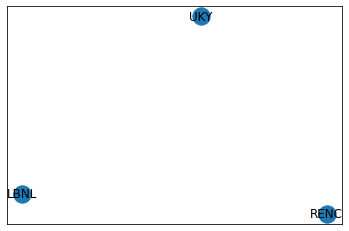

In [6]:
advertised_topology.draw()

## Create Slice

In [7]:
import fim.user as fu
# Create topology
t = fu.ExperimentTopology()

# Add node
n1 = t.add_node(name='n1', site='RENC')

# Set capacities
cap = fu.Capacities()
cap.set_fields(core=4, ram=64, disk=500)

# Set Properties
n1.set_properties(capacities=cap, image_type='qcow2', image_ref='default_ubuntu_20')

# Add PCI devices
n1.add_component(ctype=fu.ComponentType.SmartNIC, model='ConnectX-5', name='nic1')

# Add node
n2 = t.add_node(name='n2', site='LBNL')

# Set properties
n2.set_properties(capacities=cap, image_type='qcow2', image_ref='default_ubuntu_20')

# Add PCI devices
n2.add_component(ctype=fu.ComponentType.GPU, model='Tesla T4', name='nic2')




# # Add node
# n3 = t.add_node(name='n3', site='LBNL')

# # Set properties
# n3.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# # Add PCI devices
# n3.add_component(ctype=fu.ComponentType.GPU, model='Tesla T4', name='nic3')

# Generate Slice Graph
slice_graph = t.serialize()

ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read()
    ssh_key=ssh_key.strip()

# Request slice from Orchestrator
status, reservations = orchestrator_proxy.create(token=fabric_id_token, slice_name='JupyterSlice2', slice_graph=slice_graph, ssh_key=ssh_key)

print("Response Status {}".format(status))
print("Reservations created {}".format(reservations))

Response Status Status.OK
Reservations created [{
    "graph_node_id": "50b46843-c5db-4486-8d99-303b00a0c932",
    "join_state": "None_",
    "lease_end": "2021-04-18 12:26:43",
    "reservation_id": "20e5b9d8-50cd-4ad9-8dc1-930e0772cc4e",
    "reservation_state": "Unknown",
    "resource_type": "VM",
    "slice_id": "8a8bfacd-2e71-427f-839f-a79ab85515ab"
}, {
    "graph_node_id": "7fe87e36-e5e8-48e5-a094-ca4ef1d8b40b",
    "join_state": "None_",
    "lease_end": "2021-04-18 12:26:44",
    "reservation_id": "d0cf0b1c-58da-4a5c-9874-724772670441",
    "reservation_state": "Unknown",
    "resource_type": "VM",
    "slice_id": "8a8bfacd-2e71-427f-839f-a79ab85515ab"
}]


In [8]:
# Set the Slice ID from output of the above command
slice_id=reservations[0].slice_id

## Query Slices

In [22]:
status, slices = orchestrator_proxy.slices(token=fabric_id_token)

print("Response Status {}".format(status))
print("Slices {}".format(slices))

Response Status Status.OK
Slices [{
    "graph_id": "d57a848a-e80d-431c-a090-70858f53760a",
    "slice_id": "8a8bfacd-2e71-427f-839f-a79ab85515ab",
    "slice_name": "JupyterSlice2",
    "slice_state": "StableOK"
}]


## Query Slice

In [10]:
status, slice_obj = orchestrator_proxy.get_slice(token=fabric_id_token, slice_id=slice_id)

print("Response Status {}".format(status))
print("Response received {}".format(slice_obj))

Response Status Status.OK
Response received n1[VM]: { core: 4, ram: 64G, disk: 500G, }
n2[VM]: { core: 4, ram: 64G, disk: 500G, }
Links:


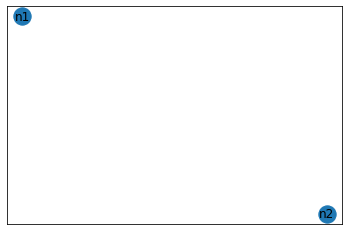

In [11]:
slice_obj.draw()

## Query Slivers

In [21]:
status, reservations = orchestrator_proxy.slivers(token=fabric_id_token, slice_id=slice_id)

print("Response Status {}".format(status))
print("Reservations {}".format(reservations))

Response Status Status.OK
Reservations [{
    "capacities": "{\"core\": 4, \"disk\": 500, \"ram\": 64}",
    "graph_node_id": "50b46843-c5db-4486-8d99-303b00a0c932",
    "join_state": "NoJoin",
    "labels": "",
    "lease_end": "2021-04-18 12:26:43",
    "management_ip": "152.54.15.33",
    "name": "n1",
    "reservation_id": "20e5b9d8-50cd-4ad9-8dc1-930e0772cc4e",
    "reservation_state": "Active",
    "resource_type": "VM",
    "site": "RENC",
    "slice_id": "8a8bfacd-2e71-427f-839f-a79ab85515ab"
}, {
    "capacities": "{\"core\": 4, \"disk\": 500, \"ram\": 64}",
    "graph_node_id": "7fe87e36-e5e8-48e5-a094-ca4ef1d8b40b",
    "join_state": "NoJoin",
    "labels": "",
    "lease_end": "2021-04-18 12:26:44",
    "management_ip": "198.129.61.38",
    "name": "n2",
    "reservation_id": "d0cf0b1c-58da-4a5c-9874-724772670441",
    "reservation_state": "Active",
    "resource_type": "VM",
    "site": "LBNL",
    "slice_id": "8a8bfacd-2e71-427f-839f-a79ab85515ab"
}]


In [23]:
# Set the Sliver ID from output of the above command by capturing reservation_id
sliver_id=reservations[0].reservation_id

## Query Sliver

In [24]:
status, reservation = orchestrator_proxy.slivers(token=fabric_id_token, slice_id=slice_id, sliver_id=sliver_id)

print("Response Status {}".format(status))
print("Reservation {}".format(reservation))

Response Status Status.OK
Reservation [{
    "capacities": "{\"core\": 4, \"disk\": 500, \"ram\": 64}",
    "graph_node_id": "50b46843-c5db-4486-8d99-303b00a0c932",
    "join_state": "NoJoin",
    "labels": "",
    "lease_end": "2021-04-18 12:26:43",
    "management_ip": "152.54.15.33",
    "name": "n1",
    "reservation_id": "20e5b9d8-50cd-4ad9-8dc1-930e0772cc4e",
    "reservation_state": "Active",
    "resource_type": "VM",
    "site": "RENC",
    "slice_id": "8a8bfacd-2e71-427f-839f-a79ab85515ab"
}]


## Slice Status

In [25]:
status, slice_status = orchestrator_proxy.slice_status(token=fabric_id_token, slice_id=slice_id)

print("Response Status {}".format(status))
print("Slice Status {}".format(slice_status))

Response Status Status.OK
Slice Status {
    "graph_id": "d57a848a-e80d-431c-a090-70858f53760a",
    "slice_id": "8a8bfacd-2e71-427f-839f-a79ab85515ab",
    "slice_name": "JupyterSlice2",
    "slice_state": "StableOK"
}


## Sliver Status

In [26]:
status, reservation_status = orchestrator_proxy.sliver_status(token=fabric_id_token, slice_id=slice_id, sliver_id=sliver_id)

print("Response Status {}".format(status))
print("Reservation Status {}".format(reservation_status))

Response Status Status.OK
Reservation Status {
    "capacities": "{\"core\": 4, \"disk\": 500, \"ram\": 64}",
    "graph_node_id": "50b46843-c5db-4486-8d99-303b00a0c932",
    "join_state": "NoJoin",
    "labels": "",
    "lease_end": "2021-04-18 12:26:43",
    "management_ip": "152.54.15.33",
    "name": "n1",
    "notices": "Reservation 20e5b9d8-50cd-4ad9-8dc1-930e0772cc4e (Slice JupyterSlice2(8a8bfacd-2e71-427f-839f-a79ab85515ab) Graph Id:d57a848a-e80d-431c-a090-70858f53760a ) is in state [Active,None_]\n\nLast ticket update: \nTicket events: \nLast ticket update: \nTicket events: ",
    "reservation_id": "20e5b9d8-50cd-4ad9-8dc1-930e0772cc4e",
    "reservation_state": "Active",
    "resource_type": "VM",
    "site": "RENC",
    "slice_id": "8a8bfacd-2e71-427f-839f-a79ab85515ab"
}


## Work on the servers start from here

In [27]:
import paramiko

In [28]:
reservation_status.management_ip

'152.54.15.33'

In [29]:
reservations[0].management_ip

'152.54.15.33'

In [30]:
reservations[1].management_ip

'198.129.61.38'

In [291]:
key = paramiko.RSAKey.from_private_key_file("/home/fabric/.ssh/id_rsa")
client1 = paramiko.SSHClient()
client1.load_system_host_keys()
client1.set_missing_host_key_policy(paramiko.MissingHostKeyPolicy())

client1.set_missing_host_key_policy(paramiko.AutoAddPolicy())
client1.connect(reservations[0].management_ip,username='ubuntu',pkey = key)

client1

In [292]:
stdin, stdout, stderr = client1.exec_command('lsb_release -a')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.2 LTS
Release:	20.04
Codename:	focal

No LSB modules are available.



In [33]:
stdin, stdout, stderr = client1.exec_command('ip addr')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN group default qlen 1000
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
    inet 127.0.0.1/8 scope host lo
       valid_lft forever preferred_lft forever
    inet6 ::1/128 scope host 
       valid_lft forever preferred_lft forever
2: ens3: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 9000 qdisc fq_codel state UP group default qlen 1000
    link/ether fa:16:3e:ec:09:fc brd ff:ff:ff:ff:ff:ff
    inet 10.20.4.220/24 brd 10.20.4.255 scope global dynamic ens3
       valid_lft 86192sec preferred_lft 86192sec
    inet6 fe80::f816:3eff:feec:9fc/64 scope link 
       valid_lft forever preferred_lft forever
3: ens7: <BROADCAST,MULTICAST> mtu 1500 qdisc noop state DOWN group default qlen 1000
    link/ether 0c:42:a1:be:8f:e8 brd ff:ff:ff:ff:ff:ff
4: ens8: <BROADCAST,MULTICAST> mtu 1500 qdisc noop state DOWN group default qlen 1000
    link/ether 0c:42:a1:be:8f:e9 brd ff:ff:ff:ff:ff:ff




In [34]:
stdin, stdout, stderr = client1.exec_command('curl https://ipinfo.io/ip')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

152.54.15.33
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    12  100    12    0     0     16      0 --:--:-- --:--:-- --:--:--    16



In [35]:
key = paramiko.RSAKey.from_private_key_file("/home/fabric/.ssh/id_rsa")
client2 = paramiko.SSHClient()
client2.load_system_host_keys()
client2.set_missing_host_key_policy(paramiko.MissingHostKeyPolicy())

client2.set_missing_host_key_policy(paramiko.AutoAddPolicy())
client2.connect(reservations[1].management_ip,username='ubuntu',pkey = key)

client2

In [36]:
stdin, stdout, stderr = client2.exec_command('curl https://ipinfo.io/ip')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

198.129.61.38
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    13  100    13    0     0     74      0 --:--:-- --:--:-- --:--:--    74



In [37]:
stdin, stdout, stderr = client1.exec_command('curl https://ipinfo.io/ip')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

152.54.15.33
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    12  100    12    0     0    136      0 --:--:-- --:--:-- --:--:--   136



### If you look at the two cells above. You see that now we have client1 connected to a machine, and client2 connected to another machine. Simple and easy.

In [38]:
stdin, stdout, stderr = client2.exec_command('ping -c 10 152.54.15.33')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

PING 152.54.15.33 (152.54.15.33) 56(84) bytes of data.
64 bytes from 152.54.15.33: icmp_seq=1 ttl=55 time=71.9 ms
64 bytes from 152.54.15.33: icmp_seq=2 ttl=55 time=71.5 ms
64 bytes from 152.54.15.33: icmp_seq=3 ttl=55 time=71.4 ms
64 bytes from 152.54.15.33: icmp_seq=4 ttl=55 time=71.4 ms
64 bytes from 152.54.15.33: icmp_seq=5 ttl=55 time=71.4 ms
64 bytes from 152.54.15.33: icmp_seq=6 ttl=55 time=71.5 ms
64 bytes from 152.54.15.33: icmp_seq=7 ttl=55 time=71.5 ms
64 bytes from 152.54.15.33: icmp_seq=8 ttl=55 time=71.4 ms
64 bytes from 152.54.15.33: icmp_seq=9 ttl=55 time=71.3 ms
64 bytes from 152.54.15.33: icmp_seq=10 ttl=55 time=71.4 ms

--- 152.54.15.33 ping statistics ---
10 packets transmitted, 10 received, 0% packet loss, time 9013ms
rtt min/avg/max/mdev = 71.348/71.468/71.930/0.161 ms




In [39]:
stdin, stdout, stderr = client1.exec_command('ping -c 10 198.129.61.38')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

PING 198.129.61.38 (198.129.61.38) 56(84) bytes of data.
64 bytes from 198.129.61.38: icmp_seq=1 ttl=50 time=71.3 ms
64 bytes from 198.129.61.38: icmp_seq=2 ttl=50 time=71.4 ms
64 bytes from 198.129.61.38: icmp_seq=3 ttl=50 time=71.4 ms
64 bytes from 198.129.61.38: icmp_seq=4 ttl=50 time=71.4 ms
64 bytes from 198.129.61.38: icmp_seq=5 ttl=50 time=71.4 ms
64 bytes from 198.129.61.38: icmp_seq=6 ttl=50 time=71.4 ms
64 bytes from 198.129.61.38: icmp_seq=7 ttl=50 time=71.4 ms
64 bytes from 198.129.61.38: icmp_seq=8 ttl=50 time=71.4 ms
64 bytes from 198.129.61.38: icmp_seq=9 ttl=50 time=71.4 ms
64 bytes from 198.129.61.38: icmp_seq=10 ttl=50 time=71.4 ms

--- 198.129.61.38 ping statistics ---
10 packets transmitted, 10 received, 0% packet loss, time 9013ms
rtt min/avg/max/mdev = 71.333/71.400/71.434/0.029 ms




### Ping experiment complete. Both nodes can see each other.

### Now, let's start a Kubernetes cluster on those two nodes.

Let's make the node connected to client 1 master.

In [40]:
stdin, stdout, stderr = client1.exec_command('sudo apt update')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [109 kB]
Get:2 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [619 kB]
Get:3 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [126 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [7436 B]
Get:5 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [181 kB]
Get:6 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [26.8 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [396 B]
Get:8 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [551 kB]
Get:9 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [82.1 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [10.7 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [14.8 kB]
Get:12 http://security.ubun

In [41]:
stdin, stdout, stderr = client1.exec_command('sudo apt-get install -y docker.io')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  bridge-utils cgroupfs-mount containerd dns-root-data dnsmasq-base libidn11
  pigz runc ubuntu-fan
Suggested packages:
  ifupdown aufs-tools debootstrap docker-doc rinse zfs-fuse | zfsutils
The following NEW packages will be installed:
  bridge-utils cgroupfs-mount containerd dns-root-data dnsmasq-base docker.io
  libidn11 pigz runc ubuntu-fan
0 upgraded, 10 newly installed, 0 to remove and 36 not upgraded.
Need to get 69.7 MB of archives.
After this operation, 334 MB of additional disk space will be used.
Get:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal/universe amd64 pigz amd64 2.4-1 [57.4 kB]
Get:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 bridge-utils amd64 1.6-2ubuntu1 [30.5 kB]
Get:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal/universe amd64 cgroupfs-mount all 1.4 [6320 B]
Get:4 http://nova.clouds.archive.ubuntu

In [42]:
stdin, stdout, stderr = client1.exec_command('sudo apt-get update && sudo apt-get install -y apt-transport-https curl')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Hit:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libcurl4
The following NEW packages will be installed:
  apt-transport-https
The following packages will be upgraded:
  curl libcurl4
2 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 397 kB of archives.
After this operation, 161 kB of additional disk space will be used.
Get:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates/universe amd64 apt-transport-https all 2.0.5 [1704 B]
Get:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates/main amd64 curl amd64 7.68.0-1ubuntu2.5 [161 kB]
Get:3 http://nova.cloud

In [43]:
stdin, stdout, stderr = client1.exec_command('curl -s https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

OK




In [44]:
# shell = client1.invoke_shell()
# shell.send('cat <<EOF | sudo tee /etc/apt/sources.list.d/kubernetes.list\n')
# shell.send('deb https://apt.kubernetes.io/ kubernetes-xenial main\n')
# shell.send('EOF\n')


stdin, stdout, stderr = client1.exec_command('cat <<EOF | sudo tee /etc/apt/sources.list.d/kubernetes.list\ndeb https://apt.kubernetes.io/ kubernetes-xenial main\nEOF\n')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

deb https://apt.kubernetes.io/ kubernetes-xenial main




In [45]:
stdin, stdout, stderr = client1.exec_command('cat /etc/apt/sources.list.d/kubernetes.list')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

deb https://apt.kubernetes.io/ kubernetes-xenial main




In [46]:
stdin, stdout, stderr = client1.exec_command('sudo apt-get update')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Hit:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Get:5 https://packages.cloud.google.com/apt kubernetes-xenial InRelease [9383 B]
Get:6 https://packages.cloud.google.com/apt kubernetes-xenial/main amd64 Packages [46.2 kB]
Fetched 55.6 kB in 1s (61.2 kB/s)
Reading package lists...




In [47]:
stdin, stdout, stderr = client1.exec_command('sudo apt-get install -y kubelet kubeadm kubectl')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  conntrack cri-tools ebtables kubernetes-cni socat
Suggested packages:
  nftables
The following NEW packages will be installed:
  conntrack cri-tools ebtables kubeadm kubectl kubelet kubernetes-cni socat
0 upgraded, 8 newly installed, 0 to remove and 34 not upgraded.
Need to get 70.5 MB of archives.
After this operation, 309 MB of additional disk space will be used.
Get:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 conntrack amd64 1:1.4.5-2 [30.3 kB]
Get:4 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 ebtables amd64 2.0.11-3build1 [80.3 kB]
Get:6 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 socat amd64 1.7.3.3-2 [323 kB]
Get:2 https://packages.cloud.google.com/apt kubernetes-xenial/main amd64 cri-tools amd64 1.13.0-01 [8775 kB]
Get:3 https://packages.cloud.google.com/apt kubernetes-xenial/main amd64 ku

In [48]:
stdin, stdout, stderr = client1.exec_command('sudo apt-mark hold kubelet kubeadm kubectl')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

kubelet set on hold.
kubeadm set on hold.
kubectl set on hold.




In [49]:
stdin, stdout, stderr = client1.exec_command('sudo swapoff -a')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

In [127]:
stdin, stdout, stderr = client1.exec_command('ip address')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN group default qlen 1000
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
    inet 127.0.0.1/8 scope host lo
       valid_lft forever preferred_lft forever
    inet6 ::1/128 scope host 
       valid_lft forever preferred_lft forever
2: ens3: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 9000 qdisc fq_codel state UP group default qlen 1000
    link/ether fa:16:3e:ec:09:fc brd ff:ff:ff:ff:ff:ff
    inet 10.20.4.220/24 brd 10.20.4.255 scope global dynamic ens3
       valid_lft 86396sec preferred_lft 86396sec
    inet6 fe80::f816:3eff:feec:9fc/64 scope link 
       valid_lft forever preferred_lft forever
3: ens7: <BROADCAST,MULTICAST> mtu 1500 qdisc noop state DOWN group default qlen 1000
    link/ether 0c:42:a1:be:8f:e8 brd ff:ff:ff:ff:ff:ff
4: ens8: <BROADCAST,MULTICAST> mtu 1500 qdisc noop state DOWN group default qlen 1000
    link/ether 0c:42:a1:be:8f:e9 brd ff:ff:ff:ff:ff:ff
5: docker0: <NO-CARRIER,BROADCAST,MULTICAS

The private ip is at ens3.

In [115]:
stdin, stdout, stderr = client1.exec_command('sudo touch /etc/netplan/60-floating-ip.yaml')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

In [130]:
stdin, stdout, stderr = client1.exec_command('sudo tee -a /etc/netplan/60-floating-ip.yaml > /dev/null <<EOT\nnetwork:\n  version: 2\n  ethernets:\n    ens3:\n      addresses:\n      - 152.54.15.33/32\nEOT')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

In [131]:
stdin, stdout, stderr = client1.exec_command('sudo netplan apply')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

In [132]:
stdin, stdout, stderr = client1.exec_command('ip address')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN group default qlen 1000
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
    inet 127.0.0.1/8 scope host lo
       valid_lft forever preferred_lft forever
    inet6 ::1/128 scope host 
       valid_lft forever preferred_lft forever
2: ens3: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 9000 qdisc fq_codel state UP group default qlen 1000
    link/ether fa:16:3e:ec:09:fc brd ff:ff:ff:ff:ff:ff
    inet 152.54.15.33/32 scope global ens3
       valid_lft forever preferred_lft forever
    inet 10.20.4.220/24 brd 10.20.4.255 scope global dynamic ens3
       valid_lft 86398sec preferred_lft 86398sec
    inet6 fe80::f816:3eff:feec:9fc/64 scope link 
       valid_lft forever preferred_lft forever
3: ens7: <BROADCAST,MULTICAST> mtu 1500 qdisc noop state DOWN group default qlen 1000
    link/ether 0c:42:a1:be:8f:e8 brd ff:ff:ff:ff:ff:ff
4: ens8: <BROADCAST,MULTICAST> mtu 1500 qdisc noop state DOWN group default qlen 1000
    lin

In [218]:
# stdin, stdout, stderr = client1.exec_command('sudo kubeadm init --pod-network-cidr=192.168.0.0/16 --apiserver-advertise-address=0.0.0.0 --apiserver-cert-extra-sans=10.20.4.220,152.54.15.33')
stdin, stdout, stderr = client1.exec_command('sudo kubeadm init --pod-network-cidr=192.168.0.0/16 --apiserver-advertise-address=152.54.15.33')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

[init] Using Kubernetes version: v1.21.0
[preflight] Running pre-flight checks
[preflight] Pulling images required for setting up a Kubernetes cluster
[preflight] This might take a minute or two, depending on the speed of your internet connection
[preflight] You can also perform this action in beforehand using 'kubeadm config images pull'
[certs] Using certificateDir folder "/etc/kubernetes/pki"
[certs] Generating "ca" certificate and key
[certs] Generating "apiserver" certificate and key
[certs] apiserver serving cert is signed for DNS names [20e5b9d8-50cd-4ad9-8dc1-930e0772cc4e-n1 kubernetes kubernetes.default kubernetes.default.svc kubernetes.default.svc.cluster.local] and IPs [10.96.0.1 152.54.15.33]
[certs] Generating "apiserver-kubelet-client" certificate and key
[certs] Generating "front-proxy-ca" certificate and key
[certs] Generating "front-proxy-client" certificate and key
[certs] Generating "etcd/ca" certificate and key
[certs] Generating "etcd/server" certificate and key
[c

In [219]:
stdin, stdout, stderr = client1.exec_command('mkdir -p $HOME/.kube')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

In [220]:
stdin, stdout, stderr = client1.exec_command('yes | sudo cp -i /etc/kubernetes/admin.conf $HOME/.kube/config')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))


cp: overwrite '/home/ubuntu/.kube/config'? 


In [221]:
stdin, stdout, stderr = client1.exec_command('sudo chown $(id -u):$(id -g) $HOME/.kube/config')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

In [222]:
stdin, stdout, stderr = client1.exec_command('kubectl apply -f https://docs.projectcalico.org/v3.9/manifests/calico.yaml')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

configmap/calico-config created
customresourcedefinition.apiextensions.k8s.io/felixconfigurations.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/ipamblocks.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/blockaffinities.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/ipamhandles.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/ipamconfigs.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/bgppeers.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/bgpconfigurations.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/ippools.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/hostendpoints.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/clusterinformations.crd.projectcalico.org created
customresourcedefinition.apiextensions.k8s.io/globalnetworkpolicies.

In [223]:
stdin, stdout, stderr = client1.exec_command('kubectl get nodes')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

NAME                                      STATUS   ROLES                  AGE     VERSION
20e5b9d8-50cd-4ad9-8dc1-930e0772cc4e-n1   Ready    control-plane,master   4m38s   v1.21.0




### Whew. We should be done with the server. Now let's do the client.

In [76]:
stdin, stdout, stderr = client2.exec_command('sudo apt-get update')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [109 kB]
Hit:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [619 kB]
Get:5 http://nova.clouds.archive.ubuntu.com/ubuntu focal-backports InRelease [101 kB]
Get:6 http://nova.clouds.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [126 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [7436 B]
Get:9 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [181 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [26.8 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [396 B]
Get:12 http://security.ubuntu.com/ubuntu focal-security/univer

In [77]:
stdin, stdout, stderr = client2.exec_command('sudo apt-get install -y docker.io')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  bridge-utils cgroupfs-mount containerd dns-root-data dnsmasq-base libidn11
  pigz runc ubuntu-fan
Suggested packages:
  ifupdown aufs-tools debootstrap docker-doc rinse zfs-fuse | zfsutils
The following NEW packages will be installed:
  bridge-utils cgroupfs-mount containerd dns-root-data dnsmasq-base docker.io
  libidn11 pigz runc ubuntu-fan
0 upgraded, 10 newly installed, 0 to remove and 36 not upgraded.
Need to get 69.7 MB of archives.
After this operation, 334 MB of additional disk space will be used.
Get:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal/universe amd64 pigz amd64 2.4-1 [57.4 kB]
Get:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 bridge-utils amd64 1.6-2ubuntu1 [30.5 kB]
Get:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal/universe amd64 cgroupfs-mount all 1.4 [6320 B]
Get:4 http://nova.clouds.archive.ubuntu

In [78]:
stdin, stdout, stderr = client2.exec_command('sudo apt-get update && sudo apt-get install -y apt-transport-https curl')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal InRelease
Hit:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 http://nova.clouds.archive.ubuntu.com/ubuntu focal-backports InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libcurl4
The following NEW packages will be installed:
  apt-transport-https
The following packages will be upgraded:
  curl libcurl4
2 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 397 kB of archives.
After this operation, 161 kB of additional disk space will be used.
Get:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates/universe amd64 apt-transport-https all 2.0.5 [1704 B]
Get:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates/main amd64 curl amd64 7.68.0-1ubuntu2.5 [161 kB]
Get:3 http://nova.cloud

In [79]:
stdin, stdout, stderr = client2.exec_command('curl -s https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

OK




In [80]:
stdin, stdout, stderr = client2.exec_command('cat <<EOF | sudo tee /etc/apt/sources.list.d/kubernetes.list\ndeb https://apt.kubernetes.io/ kubernetes-xenial main\nEOF\n')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

deb https://apt.kubernetes.io/ kubernetes-xenial main




In [81]:
stdin, stdout, stderr = client2.exec_command('cat /etc/apt/sources.list.d/kubernetes.list')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

deb https://apt.kubernetes.io/ kubernetes-xenial main




In [82]:
stdin, stdout, stderr = client2.exec_command('sudo apt-get update')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Hit:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://nova.clouds.archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 http://nova.clouds.archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Get:5 https://packages.cloud.google.com/apt kubernetes-xenial InRelease [9383 B]
Get:6 https://packages.cloud.google.com/apt kubernetes-xenial/main amd64 Packages [46.2 kB]
Fetched 55.6 kB in 1s (40.0 kB/s)
Reading package lists...




In [83]:
stdin, stdout, stderr = client2.exec_command('sudo apt-get install -y kubelet kubeadm kubectl')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  conntrack cri-tools ebtables kubernetes-cni socat
Suggested packages:
  nftables
The following NEW packages will be installed:
  conntrack cri-tools ebtables kubeadm kubectl kubelet kubernetes-cni socat
0 upgraded, 8 newly installed, 0 to remove and 34 not upgraded.
Need to get 70.5 MB of archives.
After this operation, 309 MB of additional disk space will be used.
Get:1 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 conntrack amd64 1:1.4.5-2 [30.3 kB]
Get:4 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 ebtables amd64 2.0.11-3build1 [80.3 kB]
Get:8 http://nova.clouds.archive.ubuntu.com/ubuntu focal/main amd64 socat amd64 1.7.3.3-2 [323 kB]
Get:2 https://packages.cloud.google.com/apt kubernetes-xenial/main amd64 cri-tools amd64 1.13.0-01 [8775 kB]
Get:3 https://packages.cloud.google.com/apt kubernetes-xenial/main amd64 ku

In [84]:
stdin, stdout, stderr = client2.exec_command('sudo apt-mark hold kubelet kubeadm kubectl')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

kubelet set on hold.
kubeadm set on hold.
kubectl set on hold.




In [85]:
stdin, stdout, stderr = client2.exec_command('sudo swapoff -a')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

### Setup is complete. We were just running a script one command after the other. Now we need to do the join command.

Did sudo nano /etc/netplan/60-floating-ip.yaml

Also did sudo nano /etc/systemd/system/kubelet.service.d/10-kubeadm.conf. We set --node-ip to the public ip of the client node. It can now bind to it because of the previous step.

In [239]:
stdin, stdout, stderr = client2.exec_command('sudo kubeadm join 152.54.15.33:6443 --token 3aztj9.hoclo44mdgr2ysjh --discovery-token-ca-cert-hash sha256:d3dcfae8244888e64f4ecaaf1a4e9ca75b13fd5be5271de456c7371267433104')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

[preflight] Running pre-flight checks
[preflight] Reading configuration from the cluster...
[preflight] FYI: You can look at this config file with 'kubectl -n kube-system get cm kubeadm-config -o yaml'
[kubelet-start] Writing kubelet configuration to file "/var/lib/kubelet/config.yaml"
[kubelet-start] Writing kubelet environment file with flags to file "/var/lib/kubelet/kubeadm-flags.env"
[kubelet-start] Starting the kubelet
[kubelet-start] Waiting for the kubelet to perform the TLS Bootstrap...

This node has joined the cluster:
* Certificate signing request was sent to apiserver and a response was received.
* The Kubelet was informed of the new secure connection details.

Run 'kubectl get nodes' on the control-plane to see this node join the cluster.


	[WARNING Service-Docker]: docker service is not enabled, please run 'systemctl enable docker.service'
	[WARNING IsDockerSystemdCheck]: detected "cgroupfs" as the Docker cgroup driver. The recommended driver is "systemd". Please follow

In [240]:
stdin, stdout, stderr = client1.exec_command('kubectl get nodes')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

NAME                                      STATUS   ROLES                  AGE   VERSION
20e5b9d8-50cd-4ad9-8dc1-930e0772cc4e-n1   Ready    control-plane,master   18m   v1.21.0
d0cf0b1c-58da-4a5c-9874-724772670441-n2   Ready    <none>                 15s   v1.21.0




We can see the client node! Awesome!

### Now let's run an application on the cluster.

In [297]:
stdin, stdout, stderr = client1.exec_command('kubectl create deployment hello-node --image=k8s.gcr.io/echoserver:1.4')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

deployment.apps/hello-node created




In [298]:
stdin, stdout, stderr = client1.exec_command('kubectl expose deployment hello-node --type=ClusterIP --port=8080')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

service/hello-node exposed




In [327]:
stdin, stdout, stderr = client1.exec_command('kubectl port-forward --address 0.0.0.0 service/hello-node 8080:8080 > /dev/null 2>&1 &')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

In [303]:
stdin, stdout, stderr = client2.exec_command('ip address')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN group default qlen 1000
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
    inet 127.0.0.1/8 scope host lo
       valid_lft forever preferred_lft forever
    inet6 ::1/128 scope host 
       valid_lft forever preferred_lft forever
2: ens3: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 9000 qdisc fq_codel state UP group default qlen 1000
    link/ether fa:16:3e:68:f3:5e brd ff:ff:ff:ff:ff:ff
    inet 10.20.4.61/24 brd 10.20.4.255 scope global dynamic ens3
       valid_lft 63005sec preferred_lft 63005sec
    inet6 fe80::f816:3eff:fe68:f35e/64 scope link 
       valid_lft forever preferred_lft forever
3: docker0: <NO-CARRIER,BROADCAST,MULTICAST,UP> mtu 1500 qdisc noqueue state DOWN group default 
    link/ether 02:42:43:a1:e1:4a brd ff:ff:ff:ff:ff:ff
    inet 172.17.0.1/16 brd 172.17.255.255 scope global docker0
       valid_lft forever preferred_lft forever
13: cali5eefea563d2@if3: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu

In [304]:
stdin, stdout, stderr = client1.exec_command('kubectl get services')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

NAME         TYPE        CLUSTER-IP      EXTERNAL-IP   PORT(S)    AGE
hello-node   ClusterIP   10.111.57.137   <none>        8080/TCP   14m
kubernetes   ClusterIP   10.96.0.1       <none>        443/TCP    13h




In [326]:
stdin, stdout, stderr = client1.exec_command('kubectl get nodes -o wide')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

NAME                                      STATUS   ROLES                  AGE     VERSION   INTERNAL-IP     EXTERNAL-IP   OS-IMAGE             KERNEL-VERSION     CONTAINER-RUNTIME
20e5b9d8-50cd-4ad9-8dc1-930e0772cc4e-n1   Ready    control-plane,master   15h     v1.21.0   10.20.4.220     <none>        Ubuntu 20.04.2 LTS   5.4.0-70-generic   docker://19.3.8
d0cf0b1c-58da-4a5c-9874-724772670441-n2   Ready    <none>                 3m25s   v1.21.0   198.129.61.38   <none>        Ubuntu 20.04.2 LTS   5.4.0-70-generic   docker://19.3.8




Let's test if the application is running. Let's do this on the master node itself.

In [328]:
stdin, stdout, stderr = client1.exec_command('curl localhost:8080')
print(stdout.read().decode("utf-8"))
print(stderr.read().decode("utf-8"))

CLIENT VALUES:
client_address=127.0.0.1
command=GET
real path=/
query=nil
request_version=1.1
request_uri=http://localhost:8080/

SERVER VALUES:
server_version=nginx: 1.10.0 - lua: 10001

HEADERS RECEIVED:
accept=*/*
host=localhost:8080
user-agent=curl/7.68.0
BODY:
-no body in request-
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   286    0   286    0     0   1324      0 --:--:-- --:--:-- --:--:--  1324



And now let's do the same test from our notebook. Same thing.

In [331]:
import requests

x = requests.get('http://152.54.15.33:8080')
print(x.status_code)
print(x.content.decode("utf-8"))

200
CLIENT VALUES:
client_address=127.0.0.1
command=GET
real path=/
query=nil
request_version=1.1
request_uri=http://152.54.15.33:8080/

SERVER VALUES:
server_version=nginx: 1.10.0 - lua: 10001

HEADERS RECEIVED:
accept=*/*
accept-encoding=gzip, deflate
connection=keep-alive
host=152.54.15.33:8080
user-agent=python-requests/2.25.1
BODY:
-no body in request-


### The echo server is working. Experiment complete :)

## Delete Slice

In [34]:
status, result = orchestrator_proxy.delete(token=fabric_id_token, slice_id=slice_id)

print("Response Status {}".format(status))
print("Response received {}".format(result))

Response Status Status.OK
Response received {'value': None}
